In [13]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells
import sympy as sp

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

# Optical Polarisation

Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

***Task 0***

Calculate the light intensity $I$ for the following forms of polarised light passing through a linear analyser as a function of the analyser's angle $θ$ with the vertical direction. 

Consider:

(a) Linear polarised light without analyser

(b) Circularly polarised light without analyser

(c) Linearly polarised light passing first through a $\frac{\lambda}{4}$ - waveplate before entering the linear analyser.

- Consider the special cases when $\alpha = \phi$ , $\alpha = \phi \pm \frac{\pi}{2}$ , $\alpha = \phi \pm \pi$ and $\alpha = \phi \pm \frac{\pi}{4}$. 

(d) Circularly polarised light passing first through a $\frac{\lambda}{4}$ – waveplate before entering the analyser.

- Cosider the case of $\phi = \pm\frac{\pi}{4}$

***Task 1***

Experimentally measure the light intensity as a function of the analyser angle for linear polarised light that passed through a $\frac{\lambda}{4}$ – plate under angles of 

- $\phi = 0^\circ$

- $\phi = 30^\circ$

- $\phi = 45^\circ$

Compare the measurements to the calculations from the first task by making nonlinear fits to the data or by plotting the theoretical prediction curves.

***Task 2***

Characterise the state of polarisation of three unknown black boxes in front of a light source using appropriate measurements. 

In [14]:
# GLOBALS
task_1_title_str = ['0', '30', '45'] # Degrees
phi_l = [0, -np.pi/6, np.pi/4]

## Task 0: Calculate the light intensity $I$ of polarised light

***Task Definition*** 

Calculate the theoretical light intensity $I$ for the following forms of polarised light passing through a linear analyser as a function of the analyser's angle $θ$ with the vertical direction. 

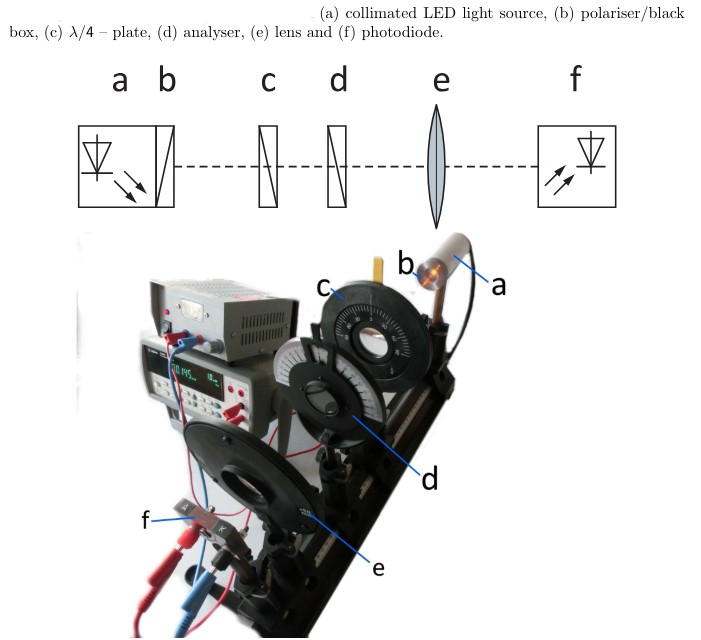

<IPython.core.display.Latex object>

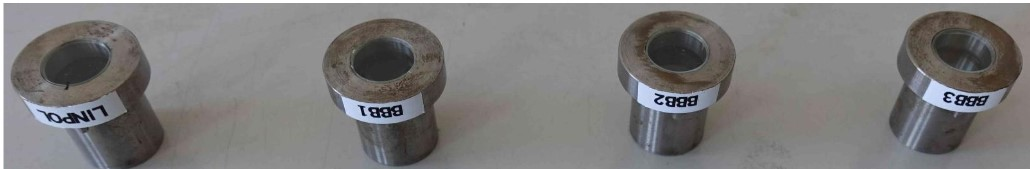

<IPython.core.display.Latex object>

In [15]:
dy(Im("./img/A1.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 1.1$: Optical Analyser Setup'))

dy(Im("./img/A2.jpg", height=100, width=400))
dy(Lx(r'$Figure\, 1.2$: Polarisers'))

***Theoretical Basis*** 

In this experiment, unpolarised light passes through 3 optical elements in the following sequence: (Polariser&rarr;Quarter Waveplate&rarr;Analyzer) 

The theory of Jones Calculas states that electromagnetic waves are represented by Jones Vectors while the effects of optical elements may be characterized by Jones matrices.

**Jones Vector**

An electromagnetic wave's Jones Vector is given by: 
$$
J_{\alpha} = \begin{pmatrix}
sin{\alpha} \\
cos{\alpha} \\
\end{pmatrix}
$$

- $\alpha$ : Angle between polariser's transmission axis and the vertical

The Jones vectors for vertical linearly, right circular and left circularly polarised light are respectively given by:

$$
\begin{array}{ccc}
J_{y} = \begin{pmatrix}
0 \\
1 
\end{pmatrix} & \quad
J_{+} = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\
-i
\end{pmatrix} & \quad
J_{-} = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\
+i
\end{pmatrix}
\end{array}
$$



**Jones Matrices**

- Analyser:

$$
\begin{array}{ccc}
M_{\theta} = \begin{pmatrix}
sin^2(\theta) & sin(\theta)cos(\theta) \\
sin(\theta)cos(\theta) & cos^2(\theta)
\end{pmatrix}
\end{array}
$$

- $\frac{\lambda}{4}$- Waveplate:

$$
\begin{array}{ccc}
M^{\phi}_{\lambda/4} = \frac{1}{\sqrt2}\begin{pmatrix}
1+icos(2\phi) & -isin(2\phi) \\
-isin(2\phi) & 1-icos(2\phi)
\end{pmatrix}
\end{array}
$$

$\phi$ : Angle between fast axis of waveplate and vertical

$\theta$ : Angle between analyzer's transmission axis and vertical

Therefore, the final Jones Vector $J_T$ after passing through all 3 optical elements is given by:

$$ J_T = M_{\theta} M^{\phi}_{\lambda/4} J_{\alpha} \label{eq1.1} \tag{1.1}$$

It is also given that the transmitted light intensity: $$I_T \propto |J_T|^2 $$
$$I_T = I_0|J_T|^2 \label{eq1.2} \tag{1.2}$$

**Tranmistted Light intensity $I_T$**

We are asked to compute the general expressions for following cases of $I_T(\theta)$. This may be easily done by applying [Eq 1.2](#mjx-eqn-eq1.2).

(a) Linear polarised light with no quarter-waveplate: $$I_T = I_0|M_{\theta} J_{\alpha}|^2$$

(b) Circularly polarised light with no quarter waveplate: $$I_T = I_0|M_{\theta} J_{+}|^2$$
$$I_T = I_0|M_{\theta} J_{-}|^2$$

(c) Linearly polarised light passing first through a λ/4 - plate before entering the linear analyser.  

(i) $\alpha = \phi$: $$ I_T = I_0 |M_{\theta} M^{\alpha}_{\frac{\lambda}{4}} J_{\alpha}|^2  $$

(ii) $\alpha = \phi \pm \pi$: $$ I_T = I_0 |M_{\theta} M^{\alpha \pm \pi}_{\frac{\lambda}{4}} J_{\alpha}|^2  $$

(iii)  $\alpha = \phi \pm \frac{\pi}{4}$: $$ I_T = I_0 |M_{\theta} M^{\alpha \pm \frac{\pi}{4}}_{\frac{\lambda}{4}} J_{\alpha}|^2  $$

(d) Circularly polarised light passing first through a λ/4 – plate before entering the analyser.

(i) $\phi = \pm \frac{\pi}{4}$: $$ I_T = I_0 |M_{\theta} M^{\pm \frac{\pi}{4}}_{\frac{\lambda}{4}} J_{\alpha}|^2  $$

***Procedure***

1. The transmission axes of LPOL and the analyzer must first be calibrated without the quarter-waveplate. **Fig 1.2**
<br>

2. Unpolarized Light is passed through LPOL which makes it polarised with respect to the transmission axis of LPOL. 
<br>

3. Subsequently, the polarized light is incident on the analyzer with ($\theta= 0^{\circ}$), and the light's intensity is measured using a connected voltmeter.
<br>

4. LPOL is slowly rotated until the voltmeter reaches its maximum value. This implies that both LPOL and the analyzer have the same transmission axes. ($\theta= \alpha = 0^{\circ}$)
<br>

5. Thereafter, the quarter-waveplate is placed back into the setup, and the angle $\phi$ is configured to a preset value of either ($0^{\circ} , 30^{\circ}$ or $45^{\circ}$) **Fig 1.1**
</br>
6. The analyzer’s angle $\theta$ is varied from ($-90^{\circ}$ to $90^{\circ}$), and the light’s intensity $I_T$ is measured using the voltmeter. This is done for each value of $\phi$, and the measurements are used to plot graphs of $I_T(\theta)$.



In [16]:
# Data Preprocessing
import glob
import os

# Define the folder path where the CSV files are located
folder_path = './data/Task1/'

# Use glob to get all CSV file paths in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Initialize an empty list to hold the DataFrames
data_frames = []

# Loop through the CSV file paths and read each into a DataFrame
for file_path in csv_files:
    df = pd.read_csv(file_path)
    df.columns = ['X', 'Y']
    data_frames.append(df)
    
#Optionally, print the DataFrames to verify their contents
#for i, df in enumerate(data_frames):
#    print(f"DataFrame {i+1}:")
#    print(df.head())

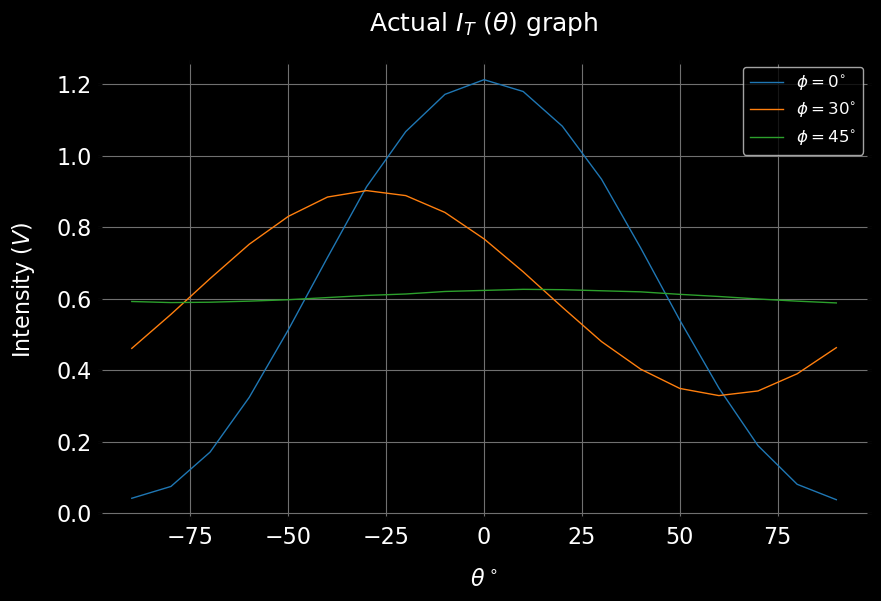

<IPython.core.display.Latex object>

In [26]:
x_l = []
y_l = []
a, b = 0, 1
for i, df in enumerate(data_frames):
    x = np.array(df['X'])
    y = np.array(df['Y'])
    #if i == 0: 
    #    b = y.max()
    #    a = y.min()
    #y = a + (y-a)/(b-a)
    x_l.append(x)
    y_l.append(y)
    plt.plot(x, y, label=r'$\phi = %s ^{\circ}$' % task_1_title_str[i])
    
#PLot Settings
plt.xlabel(r'$\theta^\circ$')
plt.ylabel(r'Intensity $(V)$')
plt.grid(True)
plt.title('Actual $I_T$ $(\\theta)$ graph')
plt.legend()
plt.show()
dy(Lx(r'$Figure\, 1.3$: Measured $I_T$ vs $\theta$ graph'))

## Task 1

***Task Definition*** 

Experimentally measure the light intensity as a function of the analyser angle for linear polarised light that passed through a $\frac{λ}{4}$ – plate under angles of $\phi = 0^\circ, 30^\circ$ and $45^\circ$.


***Theoretical Basis*** 

During this experiment, the value of $J_T$ may be calculated as follows:

In [6]:
# Define the symbolic variables
phi = sp.symbols('phi')
theta = sp.symbols('theta')

# Define Matrix A as a 2 by 1 matrix
A = sp.Matrix([[0], [1]])

# Define the expressions for the elements of Matrix B
elem11 = (1 + sp.I*sp.cos(2*phi))
elem12 = -sp.I*sp.sin(2*phi)
elem21 = -sp.I*sp.sin(2*phi)
elem22 = (1 - sp.I*sp.cos(2*phi))

# Define the constant 1/sqrt(2)
sqrt2 = sp.sqrt(2)

# Waveplate
B = (1/sqrt2) * sp.Matrix([[elem11, elem12], [elem21, elem22]])

# Analyzer
C = sp.Matrix([[sp.sin(theta)**2, sp.sin(theta)*sp.cos(theta)], [sp.sin(theta)*sp.cos(theta), sp.cos(theta)**2]])

# Multiply the matrices
BA = B * A  # First multiply B and A
CBA = C * BA  # Then multiply C and the result of BA

# Display the result in LaTeX
latex_result = sp.latex(CBA)
dy(Lx('$$J_y = %s$$' % sp.latex(A)))
dy(Lx(r'$$M^{\phi}_{\lambda/4} = %s$$' % sp.latex(B)))
dy(Lx(r'$$M_{\theta} = %s$$' % sp.latex(C)))
dy(Lx(r'$$J^\phi_{T} = M_{\theta}M^{\phi}_{\lambda/4}J_y = %s$$' % sp.latex(CBA)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Hence, the generalized fitting function is given by : $$I_T = A|J_T(\phi)|^2 + B \label{eq1.3} \tag{1.3}$$

- $A$ : Scaling parameter

- $B$ : Intercept parameter

In [7]:
def make_f2opt(lambdified):
    return lambda x, a, b: a*lambdified(x)+b

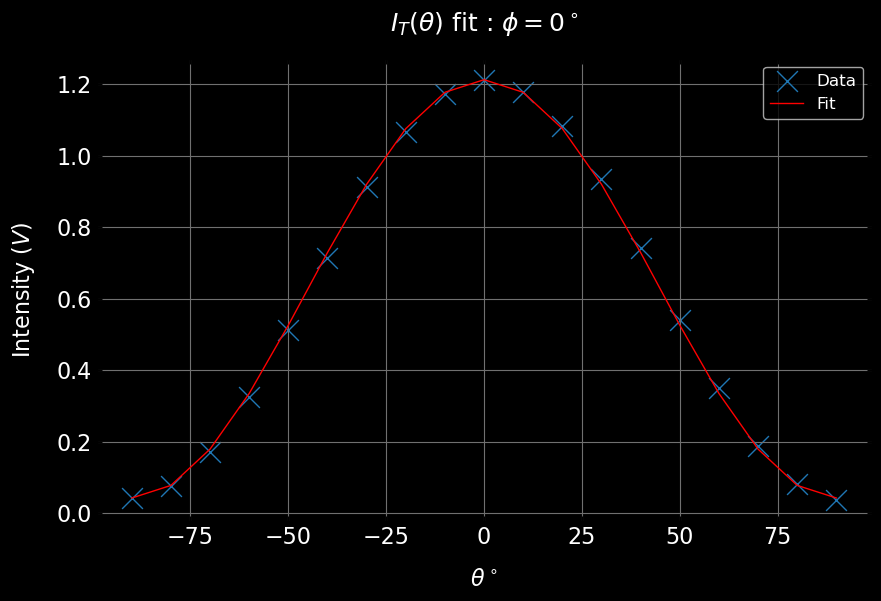

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

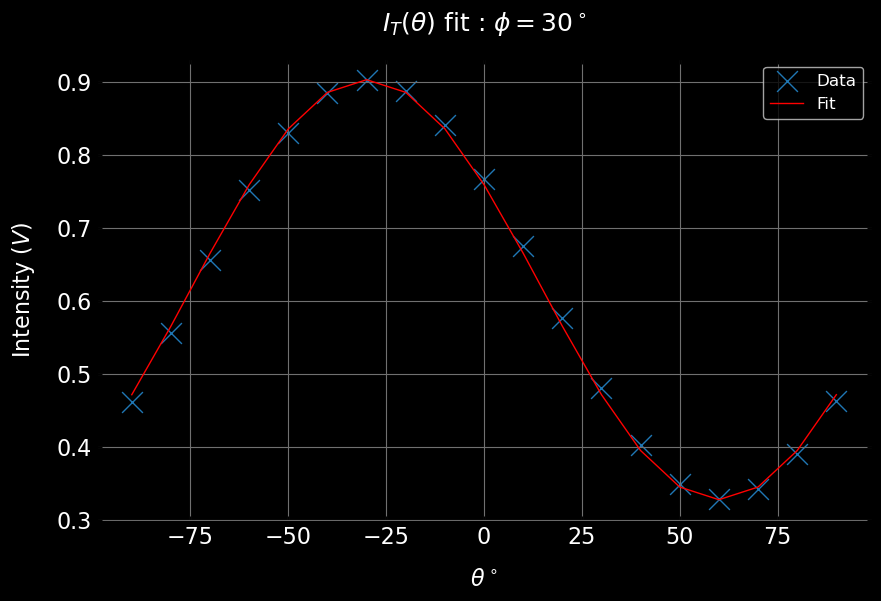

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

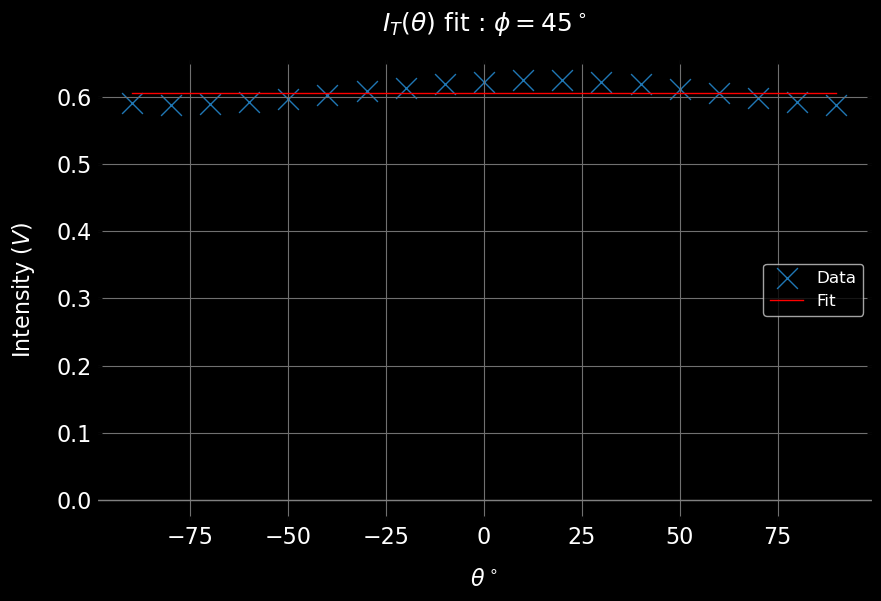

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [31]:
phi_str_l = ['0', r'\pi/6', r'\pi/4']
for i, phi_value in enumerate(phi_l):
    CBA_substituted = CBA.subs({phi: phi_value, theta: theta})
    
    
    norm_squared = sp.trigsimp(sp.expand_trig(CBA_substituted.norm()**2))

    # Convert the simplified expression to a LaTeX string
    
    # symbolic representation of fitting function
    fit_sym = CBA_substituted.norm()**2 
    # lamdify sym object
    python_formula = sp.lambdify(theta, fit_sym, 'numpy')
    # convert to fit function
    fit_f = make_f2opt(python_formula)
    fit = curve_fit(fit_f, np.deg2rad(x_l[i]), y_l[i])
    A = fit[0][0]
    u_A = np.sqrt(fit[1][0][0])
    B = fit[0][1]
    u_B = np.sqrt(fit[1][1][1])
    
    fit_y = fit_f(np.deg2rad(x_l[i]), A, B)
    
    plt.scatter(x_l[i], y_l[i], label='Data', marker='x')
    plt.plot(x_l[i], fit_y, label=r'Fit', color = 'r')
    plt.xlabel(r'$\theta^\circ$')
    plt.ylabel(r'Intensity ($V$)')
    if i==2:
        plt.axhline(0, color='grey')
    plt.grid(True)
    plt.title(r'$I_T(\theta)$ fit : $\phi = %s ^\circ$' % task_1_title_str[i])
    plt.legend()
    plt.show()
    dy(Lx(r'$Figure\, 1.%d$: Light intensity vs analyser angle fitting for $\phi = %s ^\circ$.' % (4 + i, task_1_title_str[i])))
    dy(Lx(r'$$J^{%s}_{T} = %s$$' % (phi_str_l[i], sp.latex(CBA_substituted))))
    #dy(Lx(r'$$|J^{%s}_{T}|^2 =%s$$' % (phi_str_l[i],sp.latex(norm_squared))))
    dy(Lx(r'$$I_T(\theta) = A|J^{%s}_{T}(\theta)|^2 + B$$' % (phi_str_l[i])))
    dy(Lx('where, '))
    dy(Lx(r'- $A = (%.2f ~ \pm %.3f) ~V$' % (A, u_A)))
    dy(Lx(r'- $B = (%.2f ~ \pm %.3f)~V$' % (B, u_B)))

***Analysis***

- It has been observed that the actual measurements are accurately represented by the theoretical fitting functions derived from Jones vectors and matrices.
</br> 

- A significant uncertainty is observed in parameters $A$ and $B$ corresponding to $\phi =\frac{\pi}{4}$. This is unusual and caused by python's inability to make a zero approximation for the imaginary component in $J^{\frac{\pi}{4}}_{T}(\theta)$. This leads to a failure to accurately determine the uncertainty of the fitting parameters.

***Sources of Errors***

Multiple sources of error were observed during the experiment which contributed to uncertainty in the recorded measurements of $I_T$.


- The room's brightness introduced a systemic error which was measured to be $\approx +0.004V$
</br>

- The voltmeter's resolution was $0.001V$ which introduced an error of $\pm 0.0005V$ 
</br>

- The optical analyser's resolution was $1^\circ$ which introduced an error of $\pm 0.5^\circ$ 
</br>

- The quarter waveplate's resolution was $5^\circ$ which introduced an error of $\pm 2.5^\circ$ 

Theerefore, the room's brightness is the largest contributor to the relative error in $I_T$.

## Task 2

***Task Definition*** 

Characterise the state of polarisation of three unknown black boxes in front of a light source using appropriate measurements.

***Theoretical Basis***

1. The procedure in Task 0 is repeated using unknown polarisers (BBC 1-3). 
</br> 

2. Measurements are carried out similar to Task 1. 
</br>

3. The data is analysed using **Fig2.1** to determine the state of polarisation of the unknown polarisers.

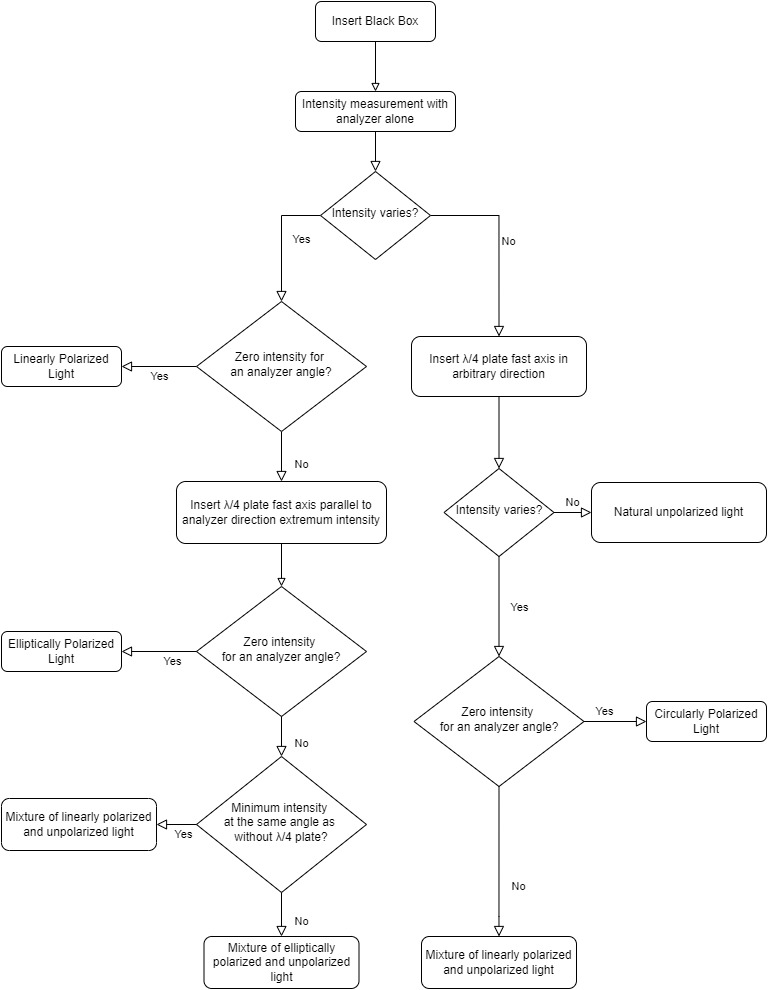

<IPython.core.display.Latex object>

In [32]:
dy(Im("./img/Diagram.jpg", height=800, width=800))
dy(Lx(r'$Figure\, 2.1$: Black Box polarization determination flowchart.'))

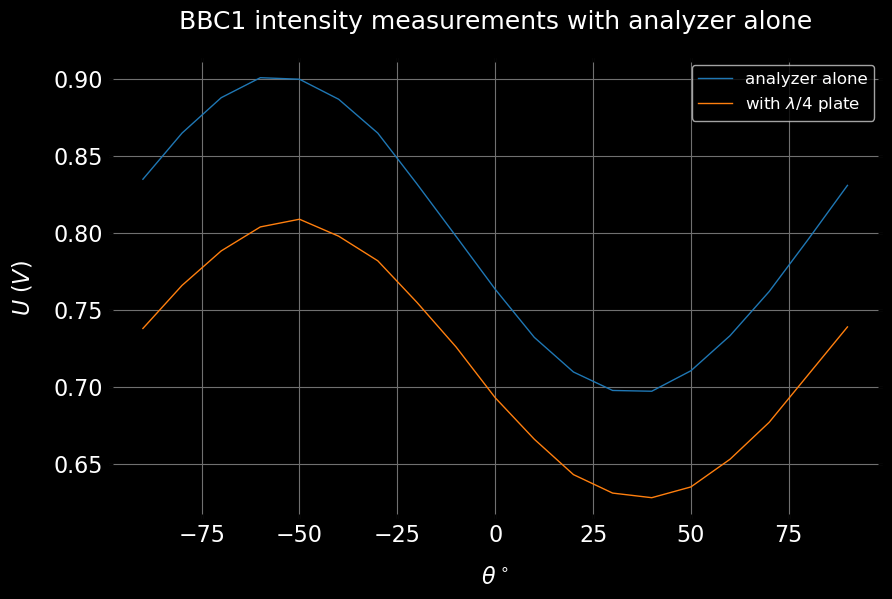

<IPython.core.display.Latex object>

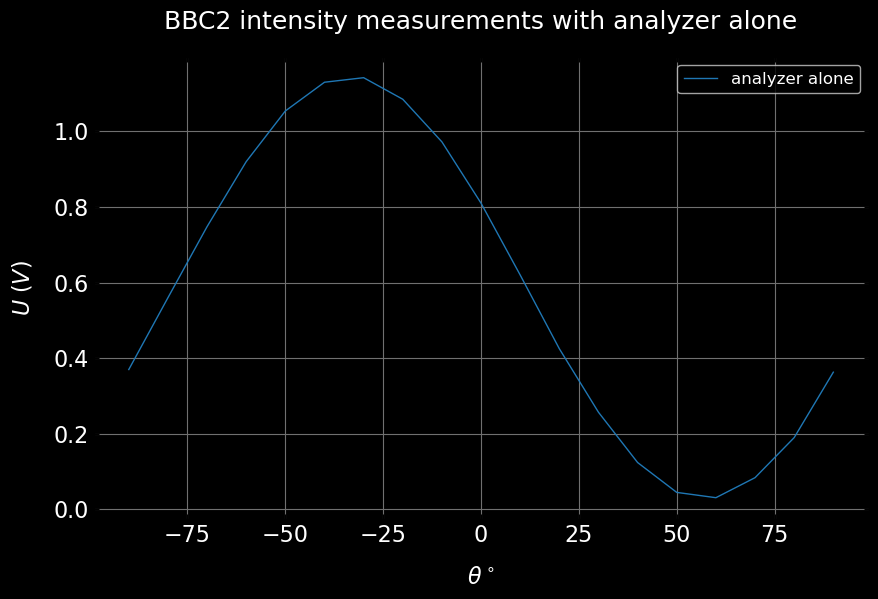

<IPython.core.display.Latex object>

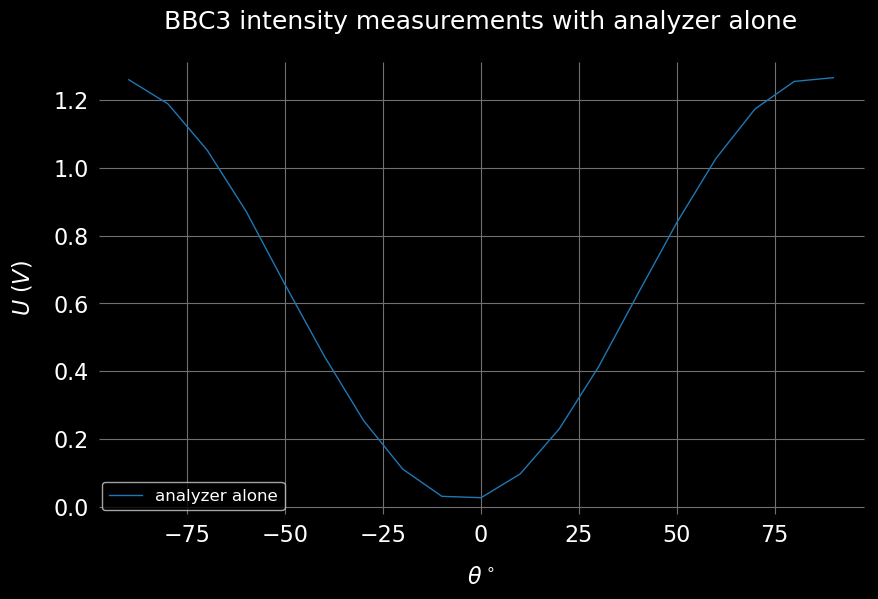

<IPython.core.display.Latex object>

In [33]:
folder_path = './data/Task2/'
task_2_title_str = ['BBC1', 'BBC2', 'BBC3']
label_str = ['analyzer alone', r'with $\lambda/4$ plate']
for k in range(len(task_2_title_str)):
    csv_files = glob.glob(os.path.join(folder_path + task_2_title_str[k], "*.csv"))
    csv_files.sort(reverse=True)
    data_frames = []

    for file_path in csv_files:
        df = pd.read_csv(file_path)
        df.columns = ['X', 'Y']
        data_frames.append(df)
    
    x_l = []
    y_l = []
    #a, b = 0, 1
    for i, df in enumerate(data_frames):
        x = np.array(df['X'])
        y = np.array(df['Y'])
        #if i == 0: 
        #    b = y.max()
        #    a = y.min()
        #y = a + (y-a)/(b-a)
        x_l.append(x)
        y_l.append(y)
        plt.plot(x, y, label=label_str[i])

    #PLot Settings
    plt.xlabel(r'$\theta^\circ$')
    plt.ylabel(r'$U$ ($V$)')
    plt.grid(True)
    plt.title('%s intensity measurements with analyzer alone' % task_2_title_str[k])
    plt.legend()
    plt.show()
    dy(Lx(r'$Figure\, 2.%d$: %s Light intensity vs analyser angle data plot.' % (2+k,task_2_title_str[k])))


***Analysis***

**BBC1:** 

Measurements: 
- Intensity varies with analyzer alone, and non-zero minimum observed at $\theta=37^\circ$
- Minimum intensity observed at the same angle with $\lambda/4$ waveplate 

Conclusion:
- BBC1 Polariser produces mixture of linearly polarized and unpolarized light. 
</br>

**BBC2 and BBC3:** 

Measurements: 

- Using analyser alone, the measured Intensity ($I_T= 0$) at $\theta = 60^\circ$ and $\theta = -5^\circ$ for BBC2 and BBC3 polarisers respectively. 

Conclusion:
- BBC2&3 Polariser produces linearly polarised light.

***References***

1) [O11e Lab instruction](https://moodle2.uni-leipzig.de/pluginfile.php/3621572/mod_resource/content/1/O11e_2024.pdf)
